# Assignment-2 (CVL-100)

###  Hourly, Monthly and Seasonal trends of PM2.5 and PM10

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly
import seaborn as sns
import re
import random
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image

In [36]:
df = pd.read_excel("A2_G4.ods", engine="odf")

In [37]:
df

,"Anand Vihar, Delhi - DPCC",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Prescribed Standards,NaN,0-60,0-100
1,Exceeding Standards,NaN,NaN,NaN
2,Remarks,NaN,NaN,NaN
3,From Date,To Date,PM2.5,PM10
4,01-01-2019 00:00,01-01-2019 01:00,517.25,950
...,...,...,...,...
8759,31-12-2019 19:00,31-12-2019 20:00,416.5,704.5
8760,31-12-2019 20:00,31-12-2019 21:00,549.5,847.25
8761,31-12-2019 21:00,31-12-2019 22:00,657.25,920
8762,31-12-2019 22:00,31-12-2019 23:00,808.5,None


In [38]:
df.describe()

,"Anand Vihar, Delhi - DPCC",Unnamed: 1,Unnamed: 2,Unnamed: 3
count,8764,8761,8762,8762
unique,8764,8761,1687,2485
top,27-12-2019 18:00,27-12-2019 18:00,None,None
freq,1,1,352,597


In [39]:
location = df.columns[0]
location

'Anand Vihar, Delhi - DPCC'

In [40]:
cols=[]
Prescribed_Standards = {"PM2.5:60","PM10:100"}
for i in df.loc[3]:
    cols.append(i)
df.columns = cols
df.drop([2], inplace=True)
# print(cols)
# print(Prescribed_Standards)

In [41]:
df

,From Date,To Date,PM2.5,PM10
0,Prescribed Standards,NaN,0-60,0-100
1,Exceeding Standards,NaN,NaN,NaN
3,From Date,To Date,PM2.5,PM10
4,01-01-2019 00:00,01-01-2019 01:00,517.25,950
5,01-01-2019 01:00,01-01-2019 02:00,531.25,939
...,...,...,...,...
8759,31-12-2019 19:00,31-12-2019 20:00,416.5,704.5
8760,31-12-2019 20:00,31-12-2019 21:00,549.5,847.25
8761,31-12-2019 21:00,31-12-2019 22:00,657.25,920
8762,31-12-2019 22:00,31-12-2019 23:00,808.5,None


In [42]:
df.drop([0,1,3], inplace=True)
df.reset_index(inplace=True)
df.drop("index",1,inplace=True)
df

,From Date,To Date,PM2.5,PM10
0,01-01-2019 00:00,01-01-2019 01:00,517.25,950
1,01-01-2019 01:00,01-01-2019 02:00,531.25,939
2,01-01-2019 02:00,01-01-2019 03:00,542,797.25
3,01-01-2019 03:00,01-01-2019 04:00,547.5,526.25
4,01-01-2019 04:00,01-01-2019 05:00,497,776.25
...,...,...,...,...
8755,31-12-2019 19:00,31-12-2019 20:00,416.5,704.5
8756,31-12-2019 20:00,31-12-2019 21:00,549.5,847.25
8757,31-12-2019 21:00,31-12-2019 22:00,657.25,920
8758,31-12-2019 22:00,31-12-2019 23:00,808.5,None


In [43]:
df

,From Date,To Date,PM2.5,PM10
0,01-01-2019 00:00,01-01-2019 01:00,517.25,950
1,01-01-2019 01:00,01-01-2019 02:00,531.25,939
2,01-01-2019 02:00,01-01-2019 03:00,542,797.25
3,01-01-2019 03:00,01-01-2019 04:00,547.5,526.25
4,01-01-2019 04:00,01-01-2019 05:00,497,776.25
...,...,...,...,...
8755,31-12-2019 19:00,31-12-2019 20:00,416.5,704.5
8756,31-12-2019 20:00,31-12-2019 21:00,549.5,847.25
8757,31-12-2019 21:00,31-12-2019 22:00,657.25,920
8758,31-12-2019 22:00,31-12-2019 23:00,808.5,None


# Hourly Trends of PM2.5 and PM10

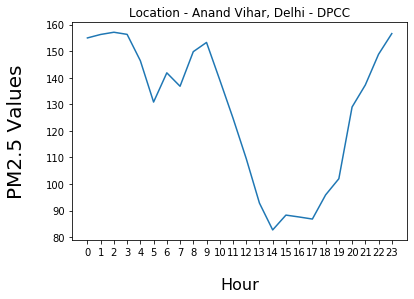

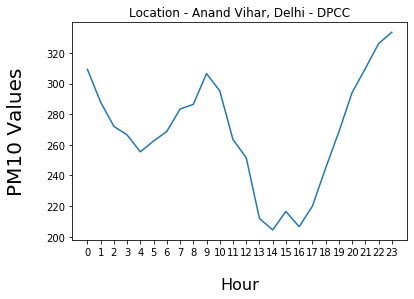

In [141]:
pollutants = {"PM2.5":"pm2_5","PM10":"pm_10"}
for j in pollutants.keys():
    hour = {"00:00":0,"01:00":0,"02:00":0,"03:00":0,"04:00":0,"05:00":0,"06:00":0,"07:00":0,"08:00":0,"09:00":0,"10:00":0,"11:00":0,"12:00":0,"13:00":0,"14:00":0,"15:00":0,"16:00":0,"17:00":0,"18:00":0,"19:00":0,"20:00":0,"21:00":0,"22:00":0,"23:00":0}
    hour_cnt = {"00:00":0,"01:00":0,"02:00":0,"03:00":0,"04:00":0,"05:00":0,"06:00":0,"07:00":0,"08:00":0,"09:00":0,"10:00":0,"11:00":0,"12:00":0,"13:00":0,"14:00":0,"15:00":0,"16:00":0,"17:00":0,"18:00":0,"19:00":0,"20:00":0,"21:00":0,"22:00":0,"23:00":0}
    x,cnt,min_val,max_val = 0,0,10000,-1
    xpoints=[]    
    for i in df.index:
        if(type(df[j][i])==float):
            hour[df["From Date"][i].split(" ")[1]] += df[j][i]
            hour_cnt[df["From Date"][i].split(" ")[1]] += 1
    for i in hour:
        hour[i]/=hour_cnt[i]

    ypoints = list(hour.values())
    time = list(hour.keys())
    for i in range(len(time)):
        time[i] = int(time[i].split(":")[0])
    plt.plot(time,ypoints)
    plt.title("Location - " + location)
    plt.xticks(time)
    plt.xlabel("Hour",fontsize=16,labelpad=20)
    plt.ylabel(j + " Values",fontsize=20,labelpad=20)
    plt.show()

# Monthly Trends of PM2.5 and PM10

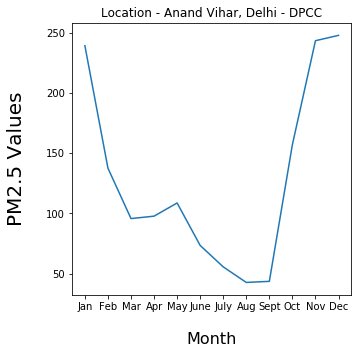

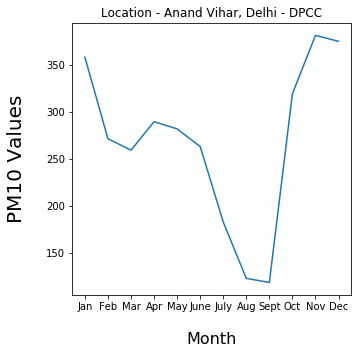

In [142]:
def give_sum(l,month,month_cnt):
    ans=0
    cnt=0
    for i in l:
        ans+=(month[i][1]*month_cnt[i][1])
        cnt+=month_cnt[i][1]
    ans/=cnt
    return ans    

season_fin = {}

for j in pollutants.keys():        
    season = [["Winter",0],["Pre-Monsoon",0],["Monsoon",0],["Post-Monsoon",0]]
    month = [["Jan",0],["Feb",0],["Mar",0],["Apr",0],["May",0],["June",0],["July",0],["Aug",0],["Sept",0],["Oct",0],["Nov",0],["Dec",0]]
    month_cnt = [["Jan",0],["Feb",0],["Mar",0],["Apr",0],["May",0],["June",0],["July",0],["Aug",0],["Sept",0],["Oct",0],["Nov",0],["Dec",0]]
    x,cnt,min_val,max_val = 0,0,10000,-1
    xpoints=[]
    for i in df.index:
        if(type(df[j][i])==float):
            month[int(df["From Date"][i].split("-")[1]) - 1][1] += df[j][i]
            month_cnt[int(df["From Date"][i].split("-")[1]) - 1][1] += 1
    ypoints=[]
    time=[]
    
    for i in range(len(month)):
        month[i][1]/=month_cnt[i][1]
        ypoints.append(month[i][1])
        time.append(month[i][0])
    
    season[0][1] = give_sum([11,0,1],month,month_cnt)
    season[1][1] = give_sum([2,3,4],month,month_cnt)
    season[2][1] = give_sum([5,6,7],month,month_cnt)
    season[3][1] = give_sum([8,9,10],month,month_cnt)
    season_fin[j] = season
    
    plt.figure(figsize=(5, 5))
    plt.title("Location - " + location)
    plt.plot(time,ypoints)
    plt.xticks(time)
    plt.xlabel("Month",fontsize=16,labelpad=20)
    plt.ylabel(j + " Values",fontsize=20,labelpad=20)
    plt.show()

# Seasonal Trends of PM2.5 and PM10

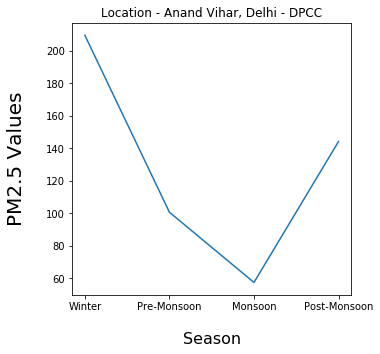

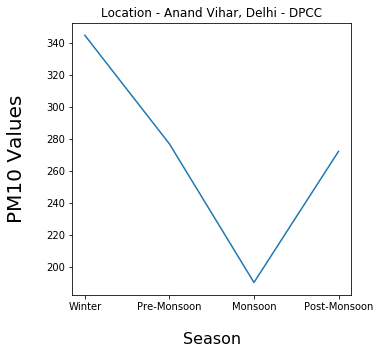

In [143]:
for j in pollutants.keys():
    season = season_fin[j]
    ypoints=[]
    time=[]
    for i in range(len(season)):
        ypoints.append(season[i][1])
        time.append(season[i][0])
        
    plt.figure(figsize=(5, 5))
    plt.plot(time,ypoints)
    plt.xticks(time)
    plt.title("Location - " + location)
    plt.xlabel("Season",fontsize=16,labelpad=20)
    plt.ylabel(j + " Values",fontsize=20,labelpad=20)
    plt.show()